In [ ]:
pip install catboost

In [ ]:
# 컬럼 분석
# batter_name(선수 이름), age(나이), G(경기 수), PA(타수), AB(타석 수), R(득점)
# H(안타), 2B(2루타), 3B(3루타), HR(홈런), TB(총 루타 수), RBI(타점), SB(도루 성공)
# CS(도루 실패), BB(볼넷 수), HBP(몸에 맞은 공), GB(고의4구), SO(삼진), GDP(병살)
# BU(희생타), fly(희생 플라이), year(해당 시즌), salary(해당 시즌의 연봉), war(대체 선수 대비 승리 기여도)
# year_born(선수 태어난 연도), hand2(타석 위치), cp(최근 포지션), tp(통합 포지션), 1B(1루타), FBP(볼넷 수 + 몸에 맞은 공)
# avg(타율), OBP(출루율), SLG(장타율), OPS(출루율 + 장타율), p_year(다음 시즌), YAB(다음 시즌 타석 수), YOPS(다음 시즌 출루율 + 장타율)

In [ ]:
%matplotlib inline

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.gridspec as gridspec
import matplotlib as mlt
import seaborn as sns
import catboost as cb
import warnings
warnings.filterwarnings("ignore")

from matplotlib import font_manager, rc #그래프 폰트 깨질경우 방지 부분
#폰트 깨지는거 수정 부분
import os

plt.rcParams['axes.unicode_minus']=False
fontpath= "/content/BMJUA_ttf.ttf"
fp=font_manager.FontProperties(fname=fontpath)

In [ ]:
!pip install statsmodels

In [ ]:
# colab 온라인 한글 폰트 설치 - 나눔고딕
!sudo apt-get install -y fonts-nanum
!sudo fc-cache -fv
!rm ~/.cache/matplotlib -rf
# 설치한 후에 런타임을 재시작해야 함 (런타임 - 런타임 다시 시작)

Reading package lists... Done
Building dependency tree       
Reading state information... Done
fonts-nanum is already the newest version (20170925-1).
0 upgraded, 0 newly installed, 0 to remove and 39 not upgraded.
/usr/share/fonts: caching, new cache contents: 0 fonts, 1 dirs
/usr/share/fonts/truetype: caching, new cache contents: 0 fonts, 3 dirs
/usr/share/fonts/truetype/humor-sans: caching, new cache contents: 1 fonts, 0 dirs
/usr/share/fonts/truetype/liberation: caching, new cache contents: 16 fonts, 0 dirs
/usr/share/fonts/truetype/nanum: caching, new cache contents: 10 fonts, 0 dirs
/usr/local/share/fonts: caching, new cache contents: 0 fonts, 0 dirs
/root/.local/share/fonts: skipping, no such directory
/root/.fonts: skipping, no such directory
/var/cache/fontconfig: cleaning cache directory
/root/.cache/fontconfig: not cleaning non-existent cache directory
/root/.fontconfig: not cleaning non-existent cache directory
fc-cache: succeeded


In [ ]:
# 한글 폰트 지정
plt.rc('font', family='NanumBarunGothic')

In [ ]:
kbo = pd.read_csv('/content/2019_kbo_for_kaggle_v2.csv', encoding='utf-8')

In [ ]:
kbo.columns

Index(['batter_name', 'age', 'G', 'PA', 'AB', 'R', 'H', '2B', '3B', 'HR', 'TB',
       'RBI', 'SB', 'CS', 'BB', 'HBP', 'GB', 'SO', 'GDP', 'BU', 'fly', 'year',
       'salary', 'war', 'year_born', 'hand2', 'cp', 'tp', '1B', 'FBP', 'avg',
       'OBP', 'SLG', 'OPS', 'p_year', 'YAB', 'YOPS'],
      dtype='object')

In [ ]:
kbo.head()

,batter_name,age,G,PA,AB,R,H,2B,3B,HR,...,tp,1B,FBP,avg,OBP,SLG,OPS,p_year,YAB,YOPS
0,백용환,24.0,26.0,58.0,52.0,4.0,9.0,4.0,0.0,0.0,...,포수,5.0,6.0,0.173,0.259,0.250,0.509,2014,79.0,0.580
1,백용환,25.0,47.0,86.0,79.0,8.0,14.0,2.0,0.0,4.0,...,포수,8.0,5.0,0.177,0.226,0.354,0.580,2015,154.0,0.784
2,백용환,26.0,65.0,177.0,154.0,22.0,36.0,6.0,0.0,10.0,...,포수,20.0,20.0,0.234,0.316,0.468,0.784,2016,174.0,0.581
3,백용환,27.0,80.0,199.0,174.0,12.0,34.0,7.0,0.0,4.0,...,포수,23.0,20.0,0.195,0.276,0.305,0.581,2017,17.0,0.476
4,백용환,28.0,15.0,20.0,17.0,2.0,3.0,0.0,0.0,0.0,...,포수,3.0,3.0,0.176,0.300,0.176,0.476,2018,47.0,0.691


In [ ]:
print(kbo.shape)

(1913, 37)


In [ ]:
kbo_grouped_y = kbo['salary'].groupby(kbo['year'])
kbo_grouped_y_sum = kbo['salary'].groupby(kbo['year']).sum()
kbo_grouped_y_sum

year
1990      21600
1991      14400
1992       9600
1993       9600
1994      12000
1995      19200
1996      28800
1997      44850
1998      64700
1999      86500
2000     139500
2001     185800
2002     250900
2003     279900
2004     370600
2005     432600
2006     531870
2007     663200
2008     842750
2009     871100
2010    1031645
2011    1185100
2012    1631800
2013    1849100
2014    2252000
2015    3249500
2016    3098100
2017    3641800
2018    4178000
Name: salary, dtype: int64

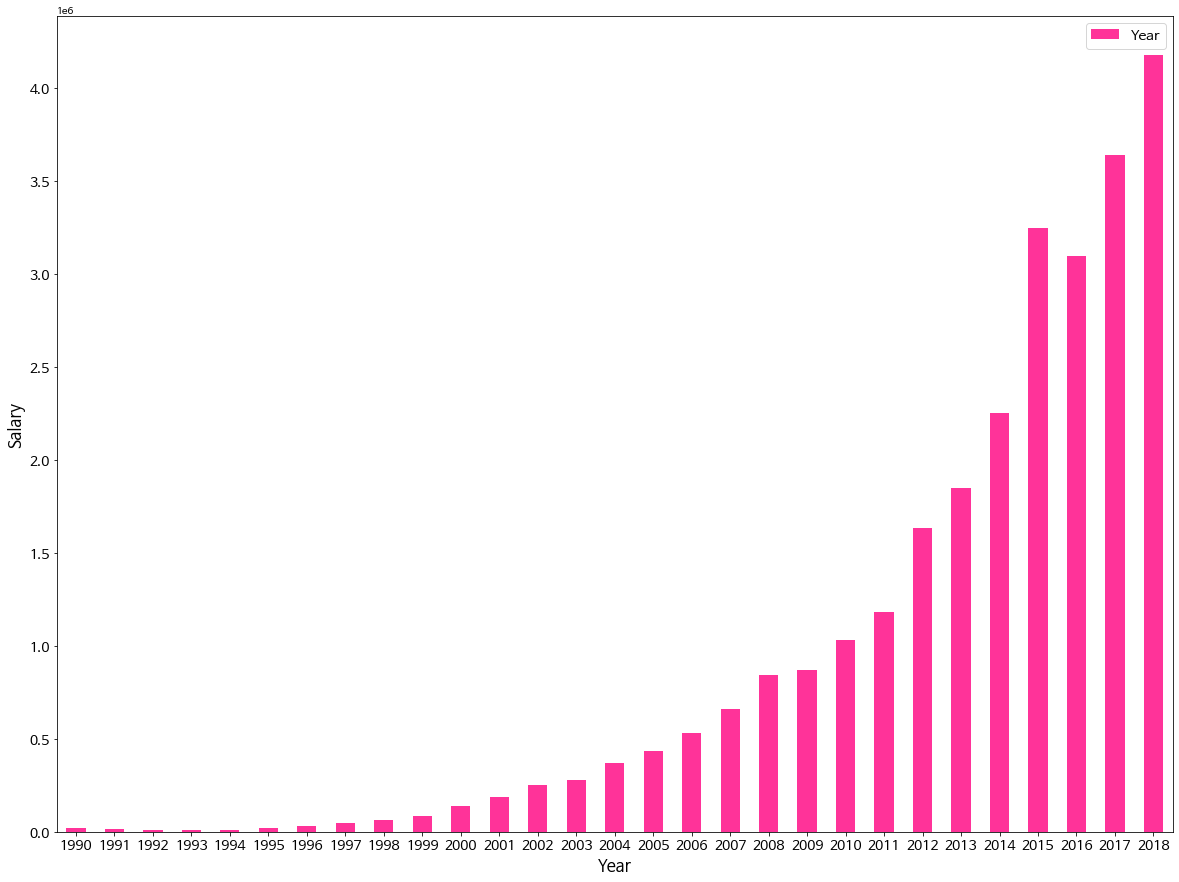

In [ ]:
kbo_grouped_y_sum.plot(kind='bar', stacked=False, figsize=[20, 15], fontsize=14, color='#ff3399',rot = 0)
plt.xlabel("Year", fontsize=16)
plt.ylabel("Salary", fontsize=16)
plt.legend(["Year"], fontsize=14)

In [ ]:
kbo_2 = pd.read_csv('/content/2019_kbo_for_kaggle_v2_2014.csv', encoding='utf-8')

In [ ]:
kbo_2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 103 entries, 0 to 102
Data columns (total 34 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   batter_name  103 non-null    object 
 1   age          103 non-null    int64  
 2   G            103 non-null    int64  
 3   PA           103 non-null    int64  
 4   AB           103 non-null    int64  
 5   R            103 non-null    int64  
 6   H            103 non-null    int64  
 7   2B           103 non-null    int64  
 8   3B           103 non-null    int64  
 9   HR           103 non-null    int64  
 10  TB           103 non-null    int64  
 11  RBI          103 non-null    int64  
 12  SB           103 non-null    int64  
 13  CS           103 non-null    int64  
 14  SB%          103 non-null    float64
 15  BB           103 non-null    int64  
 16  HBP          103 non-null    int64  
 17  GB           103 non-null    int64  
 18  SO           103 non-null    int64  
 19  GDP     

In [ ]:
kbo_2

,batter_name,age,G,PA,AB,R,H,2B,3B,HR,...,year,war,1B,FBP,avg,OBP,SLG,OPS,woba,wrc
0,강경학,22,41,103,86,11,19,2,3,1,...,2014,0.053,13,15,0.221,0.337,0.349,0.686,0.265000,41.700159
1,강민호,29,98,360,310,37,71,14,2,16,...,2014,1.684,39,46,0.229,0.325,0.442,0.767,0.290673,43.332025
2,강한울,23,93,224,208,32,55,5,4,0,...,2014,-0.362,46,9,0.264,0.294,0.327,0.621,0.254577,37.136548
3,고영우,24,21,27,24,4,2,2,0,0,...,2014,-0.487,0,2,0.083,0.148,0.167,0.315,0.130900,40.509809
4,김강민,32,113,483,430,86,130,29,3,16,...,2014,4.665,82,47,0.302,0.368,0.495,0.863,0.335672,60.435976
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
98,테임즈,28,125,514,443,95,152,30,6,37,...,2014,6.141,79,65,0.343,0.422,0.688,1.110,0.405047,89.926577
99,필,30,92,389,362,64,112,27,0,19,...,2014,2.412,66,25,0.309,0.352,0.541,0.893,0.356776,63.783753
100,허경민,24,105,233,198,33,49,8,1,0,...,2014,0.310,40,27,0.247,0.335,0.298,0.633,0.251344,36.259999
101,홍성흔,37,124,521,447,63,141,19,1,20,...,2014,3.315,101,68,0.315,0.405,0.497,0.902,0.344122,65.239697


In [ ]:
kbo_2.head()

,batter_name,age,G,PA,AB,R,H,2B,3B,HR,...,year,war,1B,FBP,avg,OBP,SLG,OPS,woba,wrc
0,강경학,22,41,103,86,11,19,2,3,1,...,2014,0.053,13,15,0.221,0.337,0.349,0.686,0.265000,41.700159
1,강민호,29,98,360,310,37,71,14,2,16,...,2014,1.684,39,46,0.229,0.325,0.442,0.767,0.290673,43.332025
2,강한울,23,93,224,208,32,55,5,4,0,...,2014,-0.362,46,9,0.264,0.294,0.327,0.621,0.254577,37.136548
3,고영우,24,21,27,24,4,2,2,0,0,...,2014,-0.487,0,2,0.083,0.148,0.167,0.315,0.130900,40.509809
4,김강민,32,113,483,430,86,130,29,3,16,...,2014,4.665,82,47,0.302,0.368,0.495,0.863,0.335672,60.435976


In [ ]:
print(kbo_2.shape)

(103, 34)


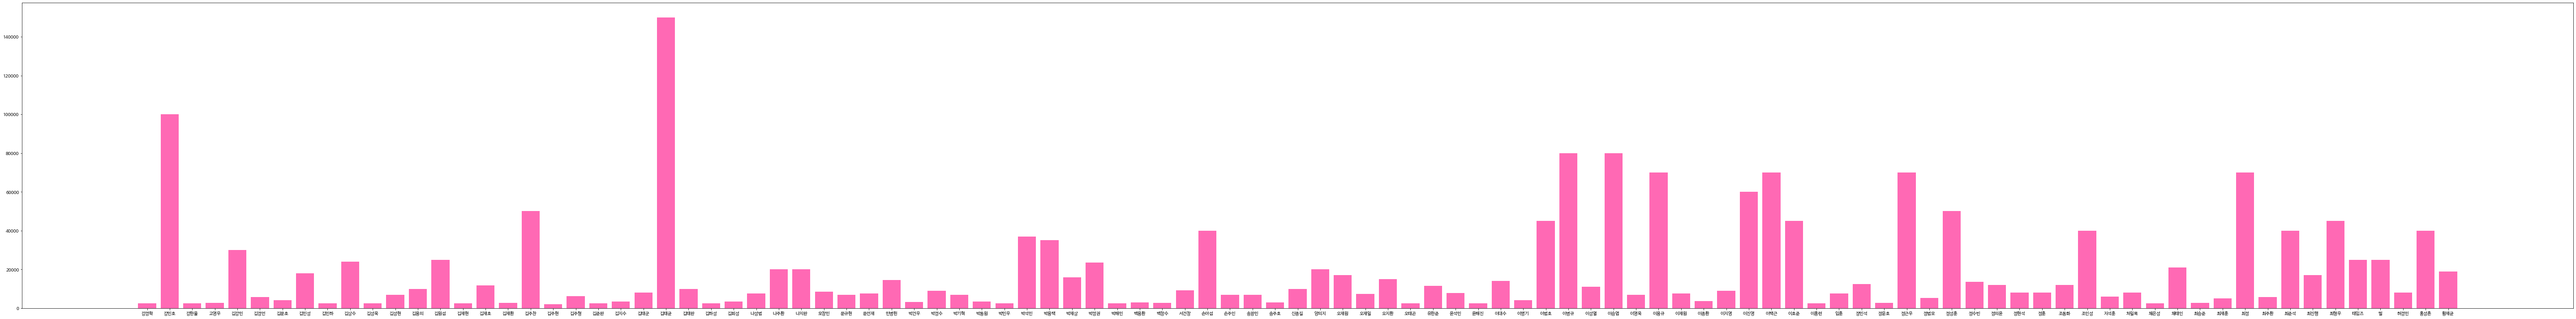

In [ ]:
plt.figure(figsize=(80, 10))

plt.bar(kbo_2['batter_name'], kbo_2['salary_2014'], color='hotpink')
plt.tight_layout()

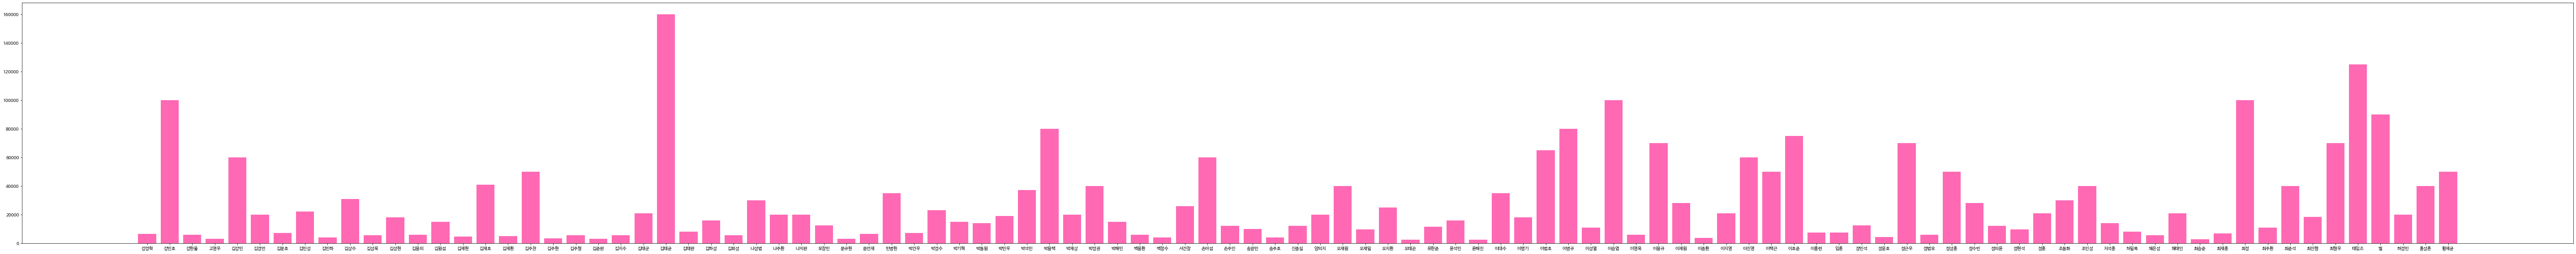

In [ ]:
plt.figure(figsize=(80, 8))

plt.bar(kbo_2['batter_name'], kbo_2['salary_2015'], color='hotpink')
plt.tight_layout()

In [ ]:
kbo_features_df = kbo_2[['age','G','PA','AB','R','H']]

In [ ]:
# 피처 각각에 대한 histogram을 출력합니다.
def regplot_each(df):
    plt.rcParams['figure.figsize'] = [15, 13]
    fig = plt.figure(1)
    
    # df의 column 갯수 만큼의 subplot을 출력합니다.
    for i in range(len(df.columns)):
        ax = fig.add_subplot(2, 3, i+1)
        sns.regplot(x=kbo_2.salary_2015, y=df[df.columns[i]], color='purple')
        ax.set_title(df.columns[i])
    plt.show()

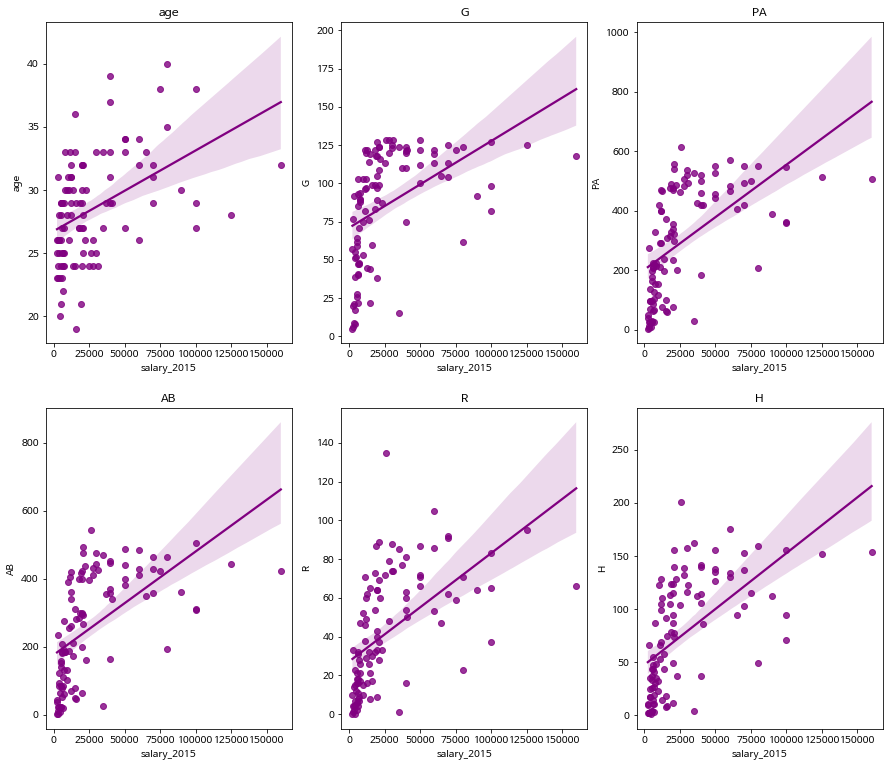

In [ ]:
regplot_each(kbo_features_df)

In [ ]:
kbo_features_df_2 = kbo_2[['2B','HR','TB','RBI','BB','war','wrc']]

In [ ]:
# 피처 각각에 대한 histogram을 출력합니다.
def regplot_each_(df):
    plt.rcParams['figure.figsize'] = [20, 17]
    fig = plt.figure(1)
    
    # df의 column 갯수 만큼의 subplot을 출력합니다.
    for i in range(len(df.columns)):
        ax = fig.add_subplot(3, 3, i+1)
        sns.regplot(x=kbo_2.salary_2015, y=df[df.columns[i]], color='purple')
        ax.set_title(df.columns[i])
    plt.show()

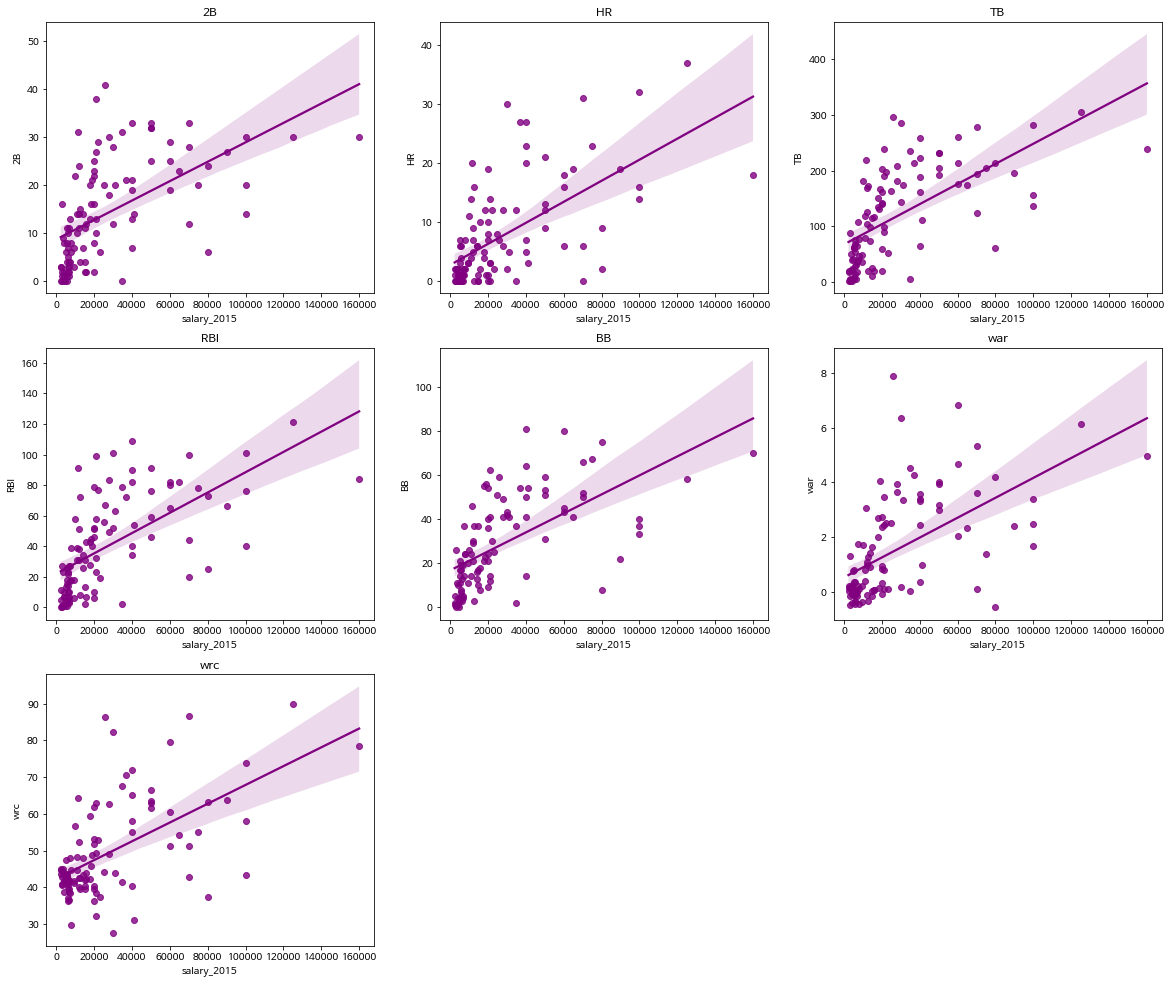

In [ ]:
regplot_each_(kbo_features_df_2)

In [ ]:
# pandas 형태로 정의된 데이터를 출력할 때, scientific-notation이 아닌 float 모양으로 출력되게 해줍니다.
pd.options.mode.chained_assignment = None

In [ ]:
# 피처 각각에 대한 scaling을 수행하는 함수를 정의
def standard_scaling(df, scale_columns):
    for col in scale_columns:
        series_mean = df[col].mean()
        series_std = df[col].std()
        df[col] = df[col].apply(lambda x: (x-series_mean)/series_std)
    return df

In [ ]:
# 피처 각각에 대한 scaling을 수행합니다.
scale_columns = ['age','G','PA','AB','R','H','2B','HR','TB','RBI','BB','war','wrc']
kbo_features_df = standard_scaling(kbo_2, scale_columns)

In [ ]:
kbo_features_df = kbo_features_df.rename(columns={'salary_2015': 'y'})
kbo_features_df.head(5)

,batter_name,age,G,PA,AB,R,H,2B,3B,HR,...,year,war,1B,FBP,avg,OBP,SLG,OPS,woba,wrc
0,강경학,-1.543691,-1.245764,-1.064855,-1.088213,-1.047563,-1.071374,-1.139201,3,-0.777993,...,2014,-0.772345,13,15,0.221,0.337,0.349,0.686,0.265000,-0.583946
1,강민호,0.119988,0.314031,0.331132,0.314035,-0.184105,-0.100758,-0.025235,2,0.976750,...,2014,0.085451,39,46,0.229,0.325,0.442,0.767,0.290673,-0.458654
2,강한울,-1.306023,0.177207,-0.407600,-0.324489,-0.350155,-0.399409,-0.860710,4,-0.894976,...,2014,-0.990607,46,9,0.264,0.294,0.327,0.621,0.254577,-0.934333
3,고영우,-1.068354,-1.793061,-1.477676,-1.476336,-1.280033,-1.388690,-1.139201,0,-0.894976,...,2014,-1.056349,0,2,0.083,0.148,0.167,0.315,0.130900,-0.675339
4,김강민,0.832993,0.724504,0.999251,1.065240,1.443181,1.000516,1.367221,3,0.976750,...,2014,1.653257,82,47,0.302,0.368,0.495,0.863,0.335672,0.854560


In [ ]:
from sklearn import linear_model
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from math import sqrt

# 학습 데이터와 테스트 데이터로 분리

X = kbo_features_df[kbo_features_df.columns.difference(['batter_name', 'y'])]
y = kbo_features_df['y']
X_train, X_test, y_train, y_test, = train_test_split(X, y, test_size=0.2, random_state=19)

In [ ]:
# 회귀 분석 계수를 학습.
lr = linear_model.LinearRegression()
model = lr.fit(X_train, y_train)

# 학습된 계수를 출력.
print(lr.coef_)

[-2.32475808e+11 -3.08043871e+12 -3.39441248e+11  2.43767446e+03
  2.59319161e+01  7.44203582e+02  2.04476673e+02 -1.89912551e+02
  1.03729106e+03  7.09576648e+02  1.25779790e+03  9.58942447e+12
 -7.40050698e+02 -3.35881561e+12 -5.41806744e+04 -1.07823364e+05
  2.13155321e+03  1.57288009e+04  8.94916234e+02 -2.98366452e+02
  2.61284818e+03 -5.36426861e+04  9.31563358e+01  4.58897751e+12
 -2.66735933e+02  5.61694927e+04  2.43964405e+03  9.95605469e-01
  5.56325885e+03  3.66500458e+05  1.13549722e+04  0.00000000e+00]


In [ ]:
import statsmodels.api as sm

# statsmodel 라이브러리로 회귀 분석을 수행
X_train = sm.add_constant(X_train)
model = sm.OLS(y_train, X_train).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.868
Model:                            OLS   Adj. R-squared:                  0.805
Method:                 Least Squares   F-statistic:                     13.88
Date:                Wed, 09 Mar 2022   Prob (F-statistic):           6.29e-16
Time:                        18:59:58   Log-Likelihood:                -882.37
No. Observations:                  82   AIC:                             1819.
Df Residuals:                      55   BIC:                             1884.
Df Model:                          26                                         
Covariance Type:            nonrobust                                         
===============================================================================
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
1B           -484.3322   3800.619     -0.127      0.899   -8100.943    7132.279
2B          -1.226e+04   5.83e+04     -0.210      0.834   -1.29e+05    1.05e+05
3B           2010.4809   6786.588      0.296      0.768   -1.16e+04    1.56e+04
AB           2506.0452   1.41e+05      0.018      0.986    -2.8e+05    2.86e+05
BB             25.9841     58.376      0.445      0.658     -91.004     142.973
BU            745.1188   1185.742      0.628      0.532   -1631.160    3121.398
CS            204.1494    930.654      0.219      0.827   -1660.923    2069.222
FBP          -190.5079   1080.314     -0.176      0.861   -2355.505    1974.489
G            1040.8952   5164.248      0.202      0.841   -9308.489    1.14e+04
GB            711.1429   2621.563      0.271      0.787   -4542.587    5964.873
GDP          1257.5392    767.919      1.638      0.107    -281.404    2796.483
H           -2424.5265   2.37e+04     -0.102      0.919      -5e+04    4.51e+04
HBP          -741.7432    716.139     -1.036      0.305   -2176.918     693.431
HR             77.6976   7.43e+04      0.001      0.999   -1.49e+05    1.49e+05
OBP         -5.416e+04   9.03e+04     -0.599      0.551   -2.35e+05    1.27e+05
OPS         -1.078e+05   1.03e+05     -1.051      0.298   -3.13e+05    9.78e+04
PA           2190.7708   1.23e+05      0.018      0.986   -2.43e+05    2.48e+05
R            1.572e+04   9422.767      1.669      0.101   -3160.809    3.46e+04
RBI           900.9079   9169.236      0.098      0.922   -1.75e+04    1.93e+04
SB           -298.3029    343.052     -0.870      0.388    -985.795     389.190
SB%          2611.7805   6132.212      0.426      0.672   -9677.446    1.49e+04
SLG         -5.364e+04   7.83e+04     -0.685      0.496   -2.11e+05    1.03e+05
SO             93.0710    191.660      0.486      0.629    -291.024     477.166
TB          -2983.1254   4.44e+04     -0.067      0.947    -9.2e+04    8.61e+04
age          -272.6284   2417.895     -0.113      0.911   -5118.199    4572.942
avg          5.618e+04   1.85e+05      0.304      0.763   -3.15e+05    4.27e+05
fly          2440.3103   2634.654      0.926      0.358   -2839.654    7720.274
salary_2014     0.9959      0.097     10.231      0.000       0.801       1.191
war          5563.4865   6533.464      0.852      0.398   -7529.869    1.87e+04
woba         3.664e+05   4.73e+05      0.775      0.441   -5.81e+05    1.31e+06
wrc           1.14e+04   9.94e+04      0.115      0.909   -1.88e+05    2.11e+05
year            9.0920    123.658      0.074      0.942    -238.723     256.907
==============================================================================
Omnibus:                       40.332   Durbin-Watson:                   1.715
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              119.683
Skew:                           1.607   Prob(J

[Text(0, 0, '1B'),
 Text(0, 0, '2B'),
 Text(0, 0, '3B'),
 Text(0, 0, 'AB'),
 Text(0, 0, 'BB'),
 Text(0, 0, 'BU'),
 Text(0, 0, 'CS'),
 Text(0, 0, 'FBP'),
 Text(0, 0, 'G'),
 Text(0, 0, 'GB'),
 Text(0, 0, 'GDP'),
 Text(0, 0, 'H'),
 Text(0, 0, 'HBP'),
 Text(0, 0, 'HR'),
 Text(0, 0, 'OBP'),
 Text(0, 0, 'OPS'),
 Text(0, 0, 'PA'),
 Text(0, 0, 'R'),
 Text(0, 0, 'RBI'),
 Text(0, 0, 'SB'),
 Text(0, 0, 'SB%'),
 Text(0, 0, 'SLG'),
 Text(0, 0, 'SO'),
 Text(0, 0, 'TB'),
 Text(0, 0, 'age'),
 Text(0, 0, 'avg'),
 Text(0, 0, 'fly'),
 Text(0, 0, 'salary_2014'),
 Text(0, 0, 'war'),
 Text(0, 0, 'woba'),
 Text(0, 0, 'wrc'),
 Text(0, 0, 'year')]

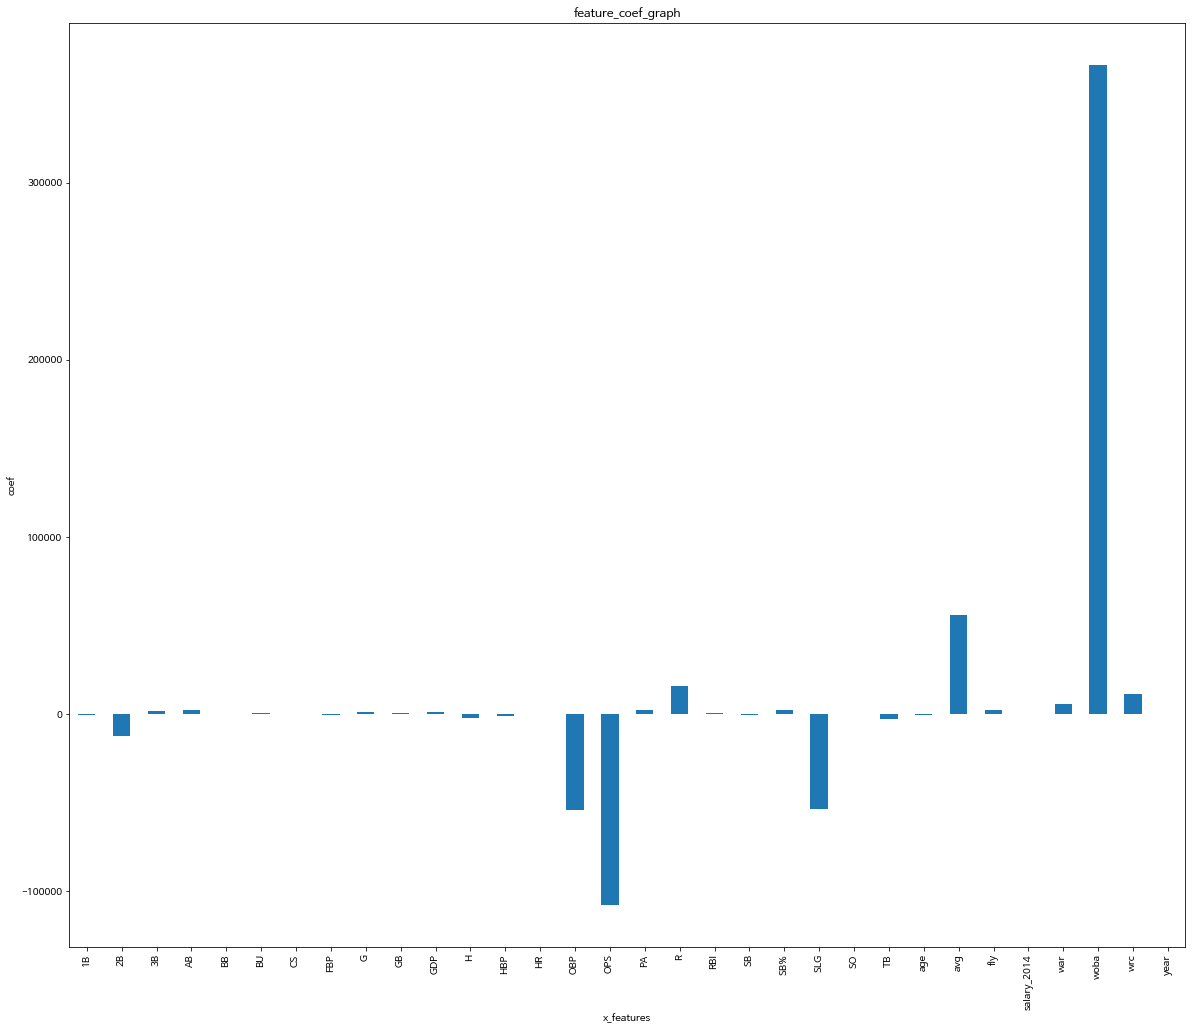

In [ ]:
# 회귀 계수를 리스트로 반환합니다.
coefs = model.params.tolist()
coefs_series = pd.Series(coefs)

# 변수명을 리스트로 반환합니다.
x_labels = model.params.index.tolist()

# 회귀 계수를 출력합니다.
ax = coefs_series.plot(kind='bar')
ax.set_title('feature_coef_graph')
ax.set_xlabel('x_features')
ax.set_ylabel('coef')
ax.set_xticklabels(x_labels)

In [ ]:
# 학습 데이터와 테스트 데이터로 분리합니다.
X = kbo_features_df[kbo_features_df.columns.difference(['batter_name', 'y'])]
y = kbo_features_df['y']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=19)

In [ ]:
# 회귀 분석 모델을 학습합니다.
lr = linear_model.LinearRegression()
model = lr.fit(X_train, y_train)

In [ ]:
# 회귀 분석 모델을 평가합니다.
print(model.score(X_train, y_train)) # train R2 score를 출력합니다.
print(model.score(X_test, y_test)) # test R2 score를 출력합니다.

0.8677443640986781
-0.034626469343251864


In [ ]:
# 회귀 분석 모델을 평가합니다.
y_predictions = lr.predict(X_train)
print(sqrt(mean_squared_error(y_train, y_predictions))) # train RMSE score를 출력합니다.
y_predictions = lr.predict(X_test)
print(sqrt(mean_squared_error(y_test, y_predictions))) # test RMSE score를 출력합니다.

11403.405162038664
17094.477672361398


In [ ]:
# 피처를 선정.
X = kbo_features_df[['age','G','PA','AB','R','H','2B','HR','TB','RBI','BB','war','wrc']]
y = kbo_features_df['y']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=19)

In [ ]:
# 모델을 학습합니다.
lr = linear_model.LinearRegression()
model = lr.fit(X_train, y_train)

In [ ]:
# 결과를 출력합니다.
print(model.score(X_train, y_train)) # train R2 score를 출력합니다.
print(model.score(X_test, y_test)) # test R2 score를 출력합니다.

0.5255058897435181
0.15970495984742372


In [ ]:
# 회귀 분석 모델을 평가합니다.
y_predictions = lr.predict(X_train)
print(sqrt(mean_squared_error(y_train, y_predictions))) # train RMSE score를 출력합니다.
y_predictions = lr.predict(X_test)
print(sqrt(mean_squared_error(y_test, y_predictions))) # test RMSE score를 출력합니다.

21599.45902583555
15405.64701897963


In [ ]:
# 2015년 연봉을 예측하여 데이터프레임의 column으로 생성합니다.
X = kbo_features_df[['age','G','PA','AB','R','H','2B','HR','TB','RBI','BB','war','wrc']]
predict_2015_salary = model.predict(X)
kbo_features_df['predict_salary_2015'] = pd.Series(predict_2015_salary)

In [ ]:
# 원래의 데이터 프레임을 다시 로드합니다.
kbo_2 = pd.read_csv('/content/2019_kbo_for_kaggle_v2_2014.csv', encoding='utf-8')
kbo_2 = kbo_features_df[['batter_name', 'salary_2014']]

# 원래의 데이터 프레임에 2015년 연봉 정보를 합칩니다.
result_df = kbo_features_df.sort_values(by=['y'], ascending=False)
result_df.drop(['salary_2014'], axis=1, inplace=True, errors='ignore')
result_df = result_df.merge(kbo_2, on=['batter_name'], how='left')
result_df = result_df[['batter_name', 'y', 'predict_salary_2015', 'salary_2014']]
result_df.columns = ['batter_name', 'salary_2015', 'predict_salary_2015', 'salary_2014']

# 재계약하여 연봉이 변화한 선수만을 대상으로 관찰합니다.
result_df = result_df[result_df['salary_2014'] != result_df['salary_2015']]
result_df = result_df.reset_index()
result_df = result_df.iloc[:10, :]
result_df.head(10)

,index,batter_name,salary_2015,predict_salary_2015,salary_2014
0,0,김태균,160000,67613.212440,150000
1,1,테임즈,125000,73052.601410,25000
2,2,이승엽,100000,76822.595686,80000
3,4,최정,100000,41105.801941,70000
4,5,필,90000,45733.798814,25000
5,7,박용택,80000,68283.132142,35000
6,8,이호준,75000,70703.570122,45000
7,10,최형우,70000,74590.995514,45000
8,12,이범호,65000,47807.513917,45000
9,13,김강민,60000,60504.784483,30000


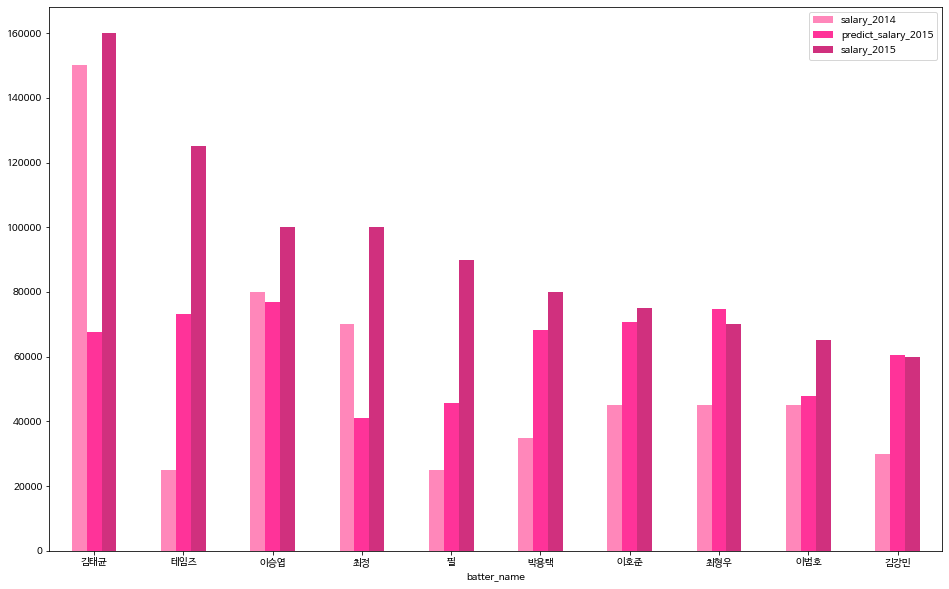

In [ ]:
# 선수별 연봉 정보(작년 연봉, 예측 연봉, 실제 연봉)를 bar 그래프로 출력합니다.
plt.rc('font', family='NanumBarunGothic')
result_df.plot(figsize=(16, 10), x='batter_name', y=['salary_2014','predict_salary_2015', 'salary_2015'], kind="bar", rot = 0, color = ['#ff87ba','#ff3399','#d0307e'])

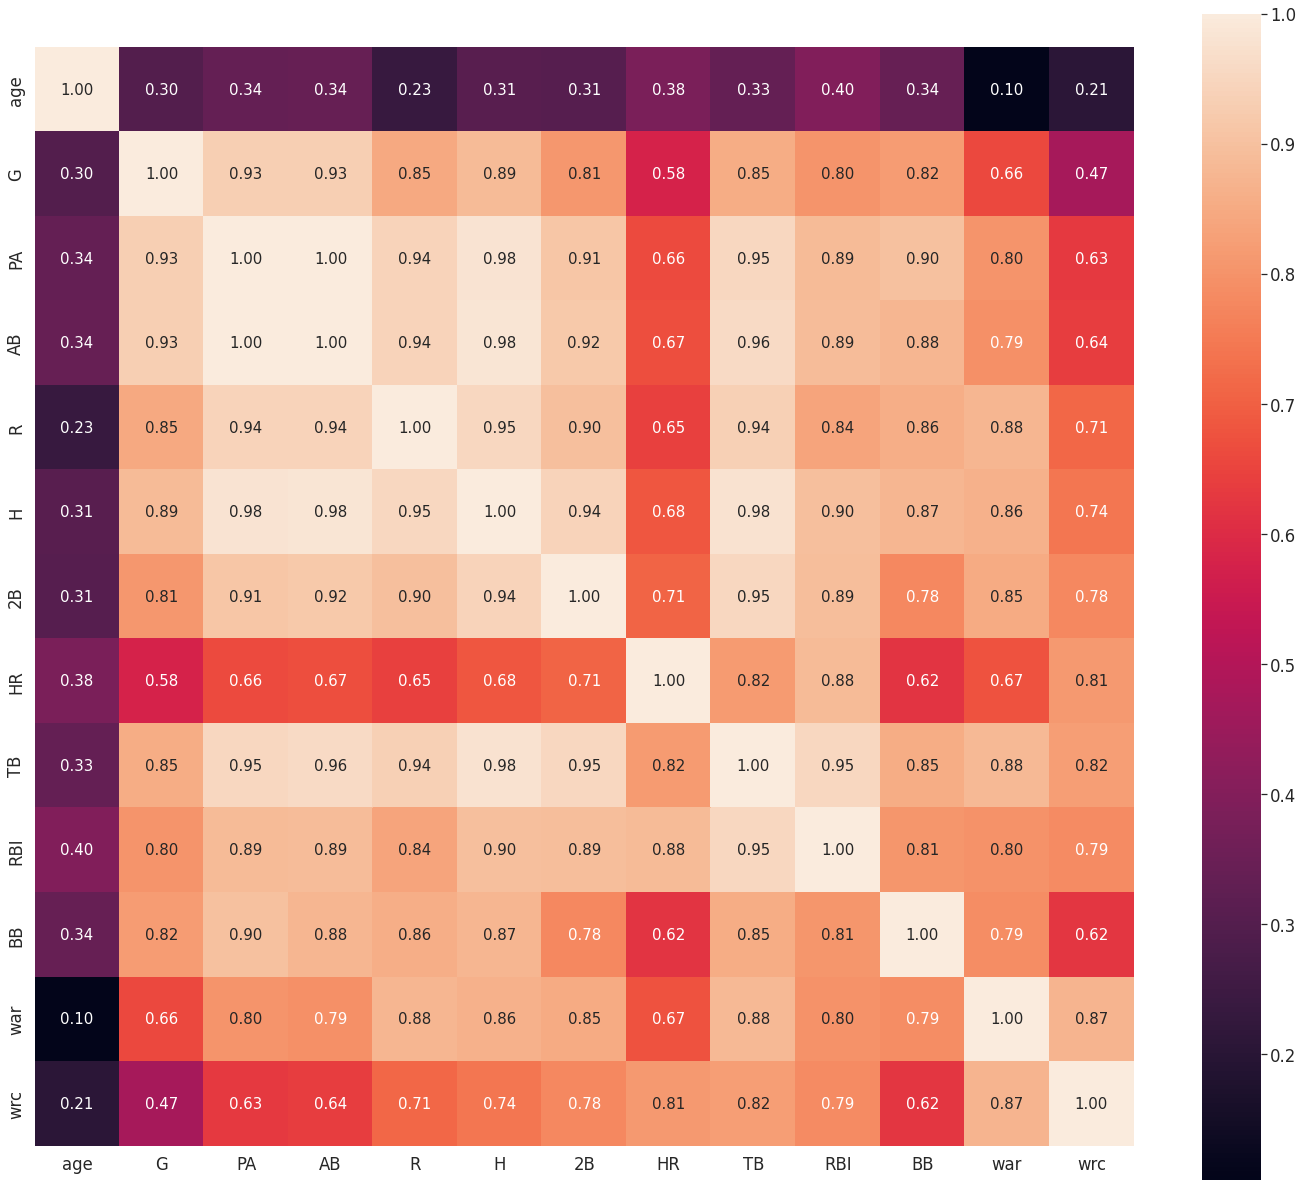

In [ ]:
import seaborn as sns

# 피처간의 상관계수 행렬을 계산합니다.
corr = kbo_features_df[scale_columns].corr(method='pearson')
show_cols = ['age','G','PA','AB','R','H','2B','HR','TB','RBI','BB','war','wrc']

# corr 행렬 히트맵을 시각화합니다.
plt.rc('font', family='NanumGothicOTF')
sns.set(font_scale=1.5)
hm = sns.heatmap(corr.values,
            cbar=True,
            annot=True, 
            square=True,
            fmt='.2f',
            annot_kws={'size': 15},
            yticklabels=show_cols,
            xticklabels=show_cols)

plt.tight_layout()
plt.show()

In [ ]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [ ]:
# 피처 및 모델을 재선정합니다.
X = kbo_features_df[['R','H','2B','HR','TB','RBI','war','wrc']]
y = kbo_features_df['y']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=19)


In [ ]:
model = cb.CatBoostRegressor(random_state=42, max_depth=5, iterations=3000, learning_rate=0.05, task_type="GPU", verbose = 0)
model.fit(X_train, y_train)

In [ ]:
print(model.score(X_train, y_train)) # train R2 score를 출력합니다.
print(model.score(X_test, y_test)) # test R2 score를 출력합니다.

0.9843031336618333
-1.5011730512372012


In [ ]:
# 회귀 분석 모델을 평가합니다.
y_predictions = model.predict(X_train)
print(sqrt(mean_squared_error(y_train, y_predictions))) # train RMSE score를 출력합니다.
y_predictions = model.predict(X_test)
print(sqrt(mean_squared_error(y_test, y_predictions))) # test RMSE score를 출력합니다.

3928.564981807114
26578.83329366273


In [ ]:
# 2015년 연봉을 예측하여 데이터프레임의 column으로 생성합니다.
X = kbo_features_df[['R','H','2B','HR','TB','RBI','war','wrc']]
predict_2015_salary = model.predict(X)
kbo_features_df['predict_salary_2015'] = pd.Series(predict_2015_salary)

In [ ]:
# 원래의 데이터 프레임을 다시 로드합니다.
kbo_2 = pd.read_csv('/content/2019_kbo_for_kaggle_v2_2014.csv', encoding='utf-8')
kbo_2 = kbo_features_df[['batter_name', 'salary_2014']]

# 원래의 데이터 프레임에 2015년 연봉 정보를 합칩니다.
result_df = kbo_features_df.sort_values(by=['y'], ascending=False)
result_df.drop(['salary_2014'], axis=1, inplace=True, errors='ignore')
result_df = result_df.merge(kbo_2, on=['batter_name'], how='left')
result_df = result_df[['batter_name', 'y', 'predict_salary_2015', 'salary_2014']]
result_df.columns = ['batter_name', 'salary_2015', 'predict_salary_2015', 'salary_2014']

# 재계약하여 연봉이 변화한 선수만을 대상으로 관찰합니다.
result_df = result_df[result_df['salary_2014'] != result_df['salary_2015']]
result_df = result_df.reset_index()
result_df = result_df.iloc[:10, :]
result_df.head(10)

,index,batter_name,salary_2015,predict_salary_2015,salary_2014
0,0,김태균,160000,160453.114672,150000
1,1,테임즈,125000,125050.876678,25000
2,2,이승엽,100000,99859.047551,80000
3,4,최정,100000,100674.999071,70000
4,5,필,90000,88437.843432,25000
5,7,박용택,80000,80013.136506,35000
6,8,이호준,75000,75110.183248,45000
7,10,최형우,70000,70026.295333,45000
8,12,이범호,65000,49862.455988,45000
9,13,김강민,60000,60004.619937,30000


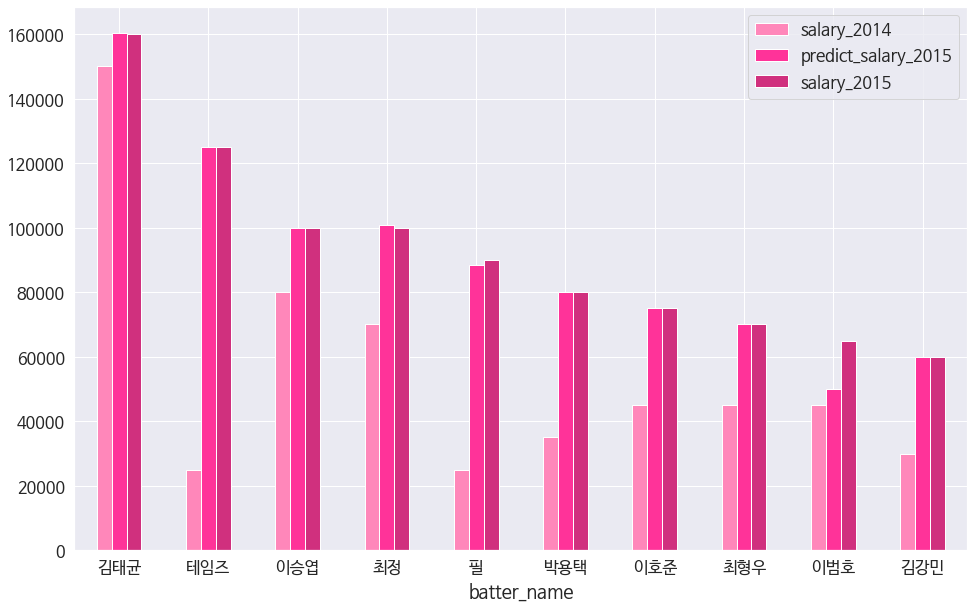

In [ ]:
# 선수별 연봉 정보(작년 연봉, 예측 연봉, 실제 연봉)를 bar 그래프로 출력합니다.
plt.rc('font', family='NanumBarunGothic')
result_df.plot(figsize=(16, 10), x='batter_name', y=['salary_2014','predict_salary_2015', 'salary_2015'], kind="bar", rot = 0, color = ['#ff87ba','#ff3399','#d0307e'])